## Bandit Algorithm

### 실습 #1 bandit.py

In [24]:
import numpy as np
import matplotlib.pyplot as plt


class Bandit:
    def __init__(self, arms=10): #arms = 슬롯머신 대수
        self.rates = np.random.rand(arms) # 슬롯머신 각각의 승률 설정(무작위)

    def play(self, arm) :
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon # 무작위로 행동할 확률(탐색 확률)
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    # 슬롯머신의 가치 추정
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    # 행동 선택(e-탐욕 정책)
    def get_action(self) :
        if np.random.rand() < self.epsilon :
            return np.random.randint (0, len(self.Qs)) # 무작위 행동 선택
        return np.argmax(self.Qs) # 탐욕 행동 선택

938


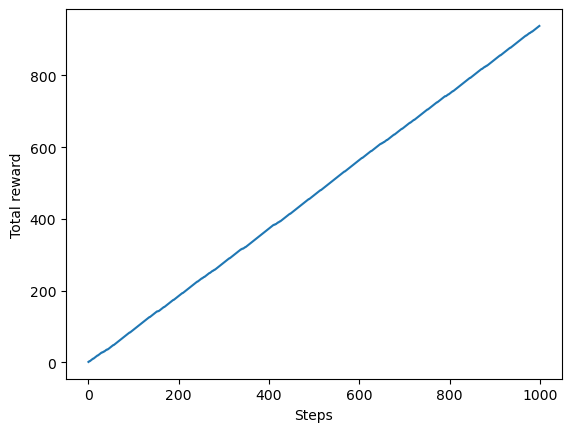

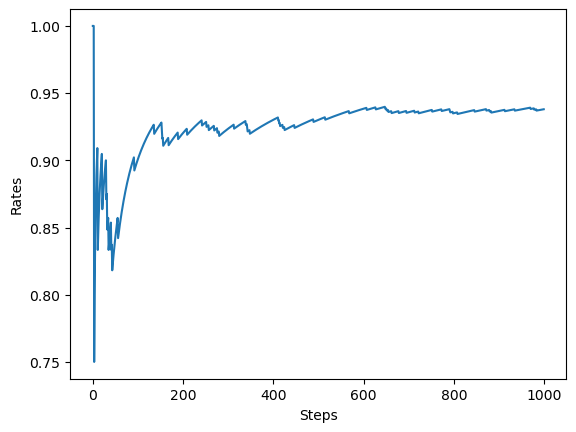

In [25]:
if __name__=='__main__' :
    steps = 1000
    epsilon = 0.1

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards= [] # 보상 합
    rates = [] # 승률

    for step in range(steps) :
        action = agent.get_action()     # 행동 선택
        reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
        agent.update(action, reward)  # 행동과 보상을 통해 학습
        total_reward += reward

        total_rewards.append(total_reward) # 현재까지의 보상 합 저장
        rates.append(total_reward/ (step + 1)) # 현재까지의 승률 저장

    print (total_reward)

    # [그림 1-12] 단계별 보상 총합
    plt.ylabel ('Total reward')
    plt.xlabel ('Steps')
    plt.plot (total_rewards)
    plt.show()

    #[그림 1-13] 단계별 승률
    plt.ylabel ('Rates')
    plt.xlabel ('Steps')
    plt.plot (rates)
    plt.show()


### 실습 #2 bandit_avg.py

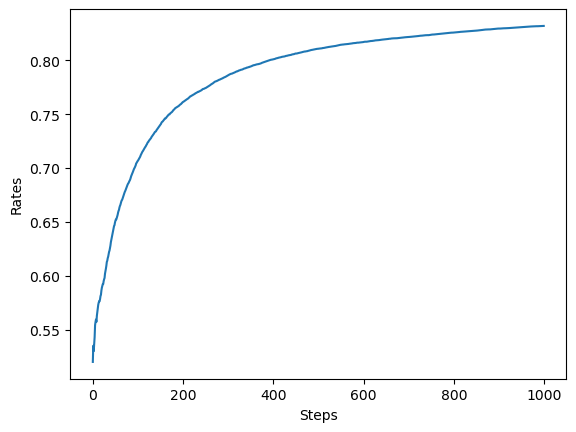

In [29]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000) 형상 배열

for run in range(runs): # 200번 실험
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = [] # 승률


    for step in range(steps) :
        action = agent.get_action()     # 행동 선택
        reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
        agent.update(action, reward)  # 행동과 보상을 통해 학습
        total_reward += reward
        rates.append(total_reward/ (step + 1)) # 현재까지의 승률 저장

    all_rates[run] = rates #보상 결과 기록

avg_rates = np.average(all_rates, axis=0) #각 단계의 평균 저장 

# [그림 1-16] 단계별 승률(200번 실험 후 평균)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## Non-Stationary Bandit Problem

### 실습 #3 non_stationary.py

In [27]:
import numpy as np
import matplotlib.pyplot as plt

class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
        
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # 노이즈 추가
        if rate > np.random.rand():
            return 1
        else:
            return 0

class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10) :
        self.epsilon = epsilon 
        self.Qs = np.zeros(actions)
        self.alpha = alpha # 고정값 alpha

    def update(self, action, reward):
        # alpha 로 갱신
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    # 행동 선택(e-탐욕 정책)
    def get_action(self) :
        if np.random.rand() < self.epsilon :
            return np.random.randint(0, len(self.Qs)) # 무작위 행동 선택
        return np.argmax(self.Qs) # 탐욕 행동 선택

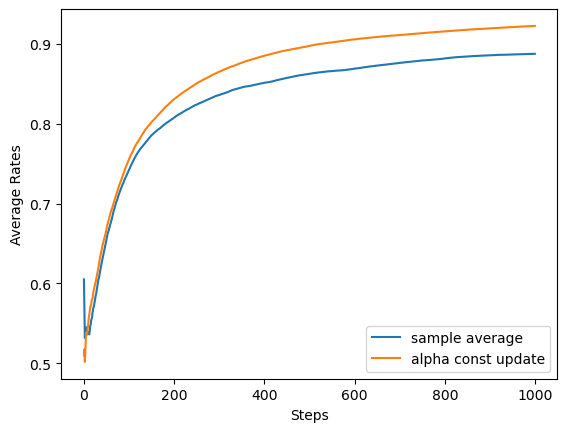

In [28]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps)) # (200, 1000) 형상 배열
 
    for run in range(runs): # 200번 실험
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent (epsilon, alpha)
        
        bandit = NonStatBandit()
        total_reward = 0
        rates = [] # 승률
    
        for step in range(steps) :
            action = agent.get_action()     # 행동 선택
            reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
            agent.update(action, reward)  # 행동과 보상을 통해 학습
            total_reward += reward
            rates.append(total_reward/ (step + 1)) # 현재까지의 승률 저장
    
        all_rates[run] = rates #보상 결과 기록
    
    avg_rates = np.average(all_rates, axis=0) #각 단계의 평균 저장 
    results[agent_type] = avg_rates
    
# [그림 1-20] 표준 평균과 고정값 알파에 의한 갱신 비교
plt.figure()
plt.ylabel('Average Rates') 
plt.xlabel('Steps')
for key, avg_rates in results. items():
    plt.plot(avg_rates, label=key)
plt.legend() 
plt.show()